# Exercises

- continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

1. Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv


In [1]:
# Import
import numpy as np
import pandas as pd

#Visualize
import matplotlib.pyplot as plt
import seaborn as sns

# Docs
import acquire

In [2]:
# 1. Using lemonade.csv dataset and focusing on continuous variables

In [3]:
#acquire data using function
lemonade_df= acquire.get_lemonade_data("https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv")

In [4]:
#Looking at first 5 values

lemonade_df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


- Note: Looking at values in columns:
    - Temperature: Most likely in Farenheit
    - rainfall: in inches
    - Price: in dollars (ex: $0.50)
    - Sales: most likely the amount of sales


In [5]:
#Looking at datatypes

lemonade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

# Answer: 
- For the lower outliers:
    - Temperature: Keep because it could have been a really cold day
    - Rain: No outliers
    - Flyers: Drop because -38 is most likely a typo
    - Price: All prices are the same
    - Sales: None

In [6]:
# This function will take in an entire dataframe, and operate on a lit of columns...
def get_low_and_up_bounds_df(df, k=1.5):
    '''
    This function takes in a pandas dataframe, list of columns, and k value, and will print out upper and lower bounds for each column.
    It takes in a default argument of the col_list being all numeric columns, and the k value=1.5
    '''
    col_list=list(df.select_dtypes(include=['int', 'float'], exclude='O'))
    for col in col_list:
        # Find the lower and upper quartiles
        q_25, q_75 = df[col].quantile([0.25, 0.75])
        # Find the Inner Quartile Range
        q_iqr = q_75 - q_25
        # Find the Upper Bound
        q_upper = q_75 + (k * q_iqr)
        # Find the Lower Bound
        q_lower = q_25 - (k * q_iqr)
        # Identify outliers
        outliers_lower = df[df[col] < q_lower]
        outliers_upper = df[df[col] > q_upper]
        outliers_all = pd.concat([outliers_lower, outliers_upper], axis=0)
        print('')
        print(col)
        print(f'K: {k}')
        print(f'Lower Fence: {q_lower}')
        print(f'Upper Fence: {q_upper}')
        print('')
        print(f'Lower Outliers in {col}')
        print('')
        print(outliers_lower)
        print('')
        print(f'Upper Outliers in {col}')
        print('')
        print(outliers_upper)
        print('')
        print(f'All Outliers in {col}')
        print('')
        print(outliers_all)
        plt.figure(figsize=(16,4))
        plt.subplot(1, 2, 1)
        sns.histplot(data = df, x = col, kde=True)
        plt.title(col)
        plt.subplot(1, 2, 2)
        sns.boxplot(x=col, data=df)
        plt.title(col)
        plt.show()
        print('-------------------------------------------------------------------')


Temperature
K: 1.5
Lower Fence: 16.700000000000003
Upper Fence: 104.7

Lower Outliers in Temperature

         Date     Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17  Sunday         15.1       2.5       9    0.5      7

Upper Outliers in Temperature

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21

All Outliers in Temperature

         Date       Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17    Sunday         15.1      2.50       9    0.5      7
41    2/11/17  Saturday        212.0      0.91      35    0.5     21


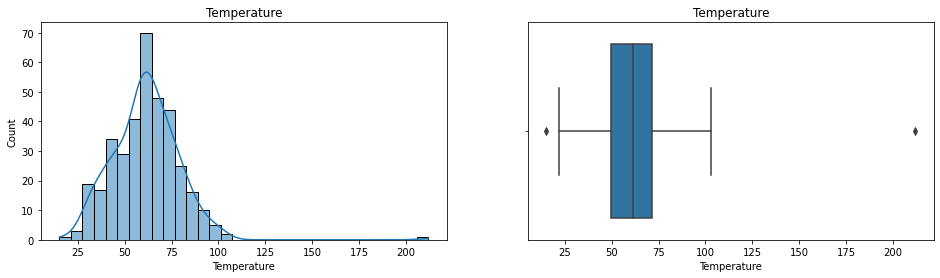

-------------------------------------------------------------------

Rainfall
K: 1.5
Lower Fence: 0.26
Upper Fence: 1.3

Lower Outliers in Rainfall

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Rainfall

         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday      

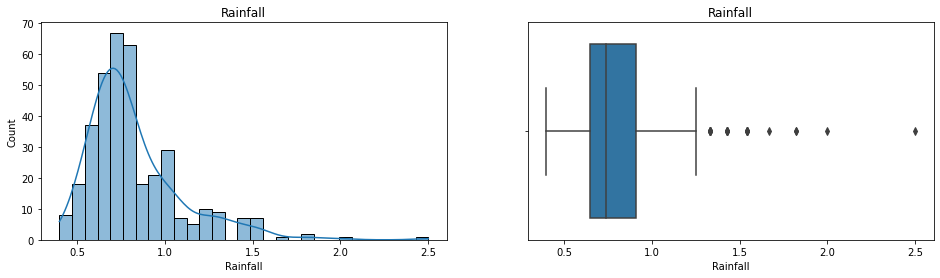

-------------------------------------------------------------------

Flyers
K: 1.5
Lower Fence: 4.0
Upper Fence: 76.0

Lower Outliers in Flyers

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20

Upper Outliers in Flyers

        Date     Day  Temperature  Rainfall  Flyers  Price  Sales
166  6/16/17  Friday         99.3      0.47      77    0.5     41
194  7/14/17  Friday         92.0      0.50      80    0.5     40

All Outliers in Flyers

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
166   6/16/17   Friday         99.3      0.47      77    0.5     41
194   7/14/17   Friday         92.0      0.50      80    0.5     40


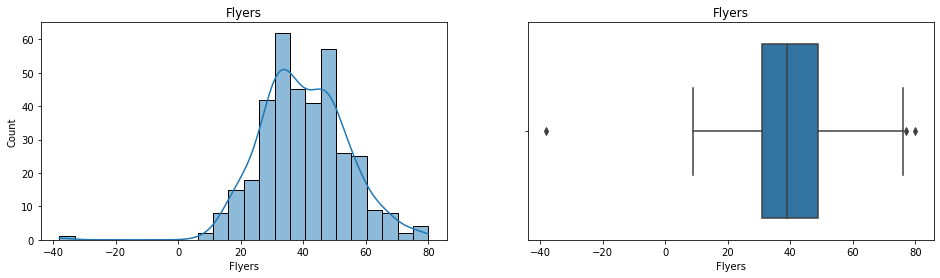

-------------------------------------------------------------------

Price
K: 1.5
Lower Fence: 0.5
Upper Fence: 0.5

Lower Outliers in Price

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Price

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

All Outliers in Price

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []


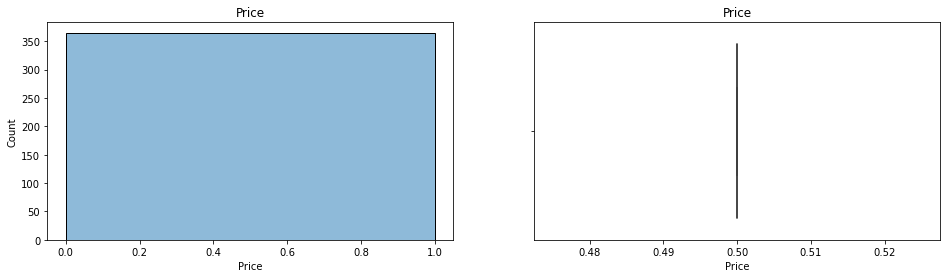

-------------------------------------------------------------------

Sales
K: 1.5
Lower Fence: 5.0
Upper Fence: 45.0

Lower Outliers in Sales

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Sales

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday         81.5      0.54      68    0.5    235
184  7/4/17   Tuesday         84.2      0.59      49    0.5    534

All Outliers in Sales

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday         81.5      0.54      68    0.5    235
184  7/4/17   Tuesday         84.2      0.59      49    0.5    534


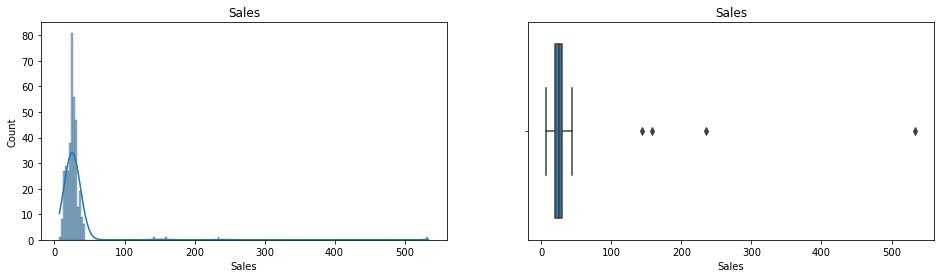

-------------------------------------------------------------------


In [7]:
#Using Function above with default of 1.5 as multiplier
get_low_and_up_bounds_df(lemonade_df, k=1.5)

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


Temperature
K: 3
Lower Fence: -16.299999999999997
Upper Fence: 137.7

Lower Outliers in Temperature

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Temperature

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21

All Outliers in Temperature

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21


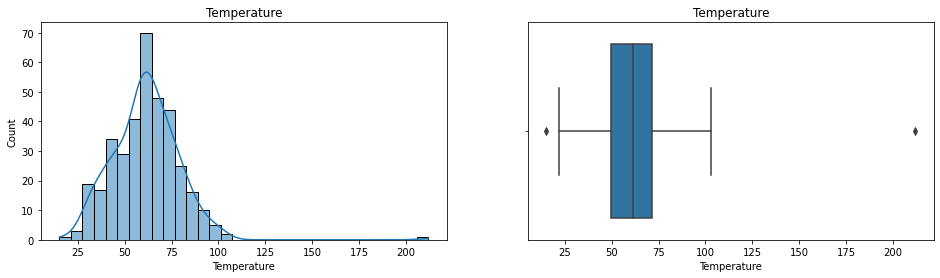

-------------------------------------------------------------------

Rainfall
K: 3
Lower Fence: -0.13
Upper Fence: 1.69

Lower Outliers in Rainfall

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Rainfall

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7

All Outliers in Rainfall

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7


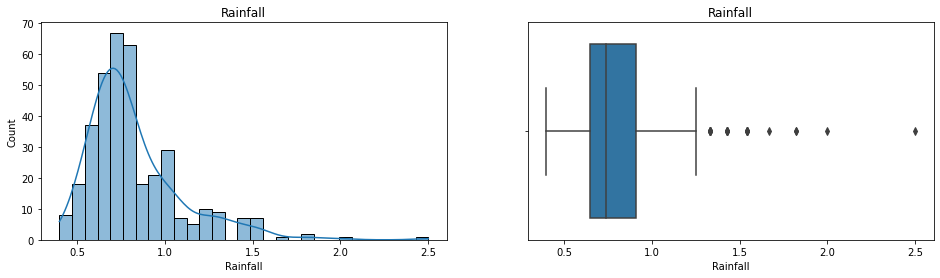

-------------------------------------------------------------------

Flyers
K: 3
Lower Fence: -23.0
Upper Fence: 103.0

Lower Outliers in Flyers

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20

Upper Outliers in Flyers

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

All Outliers in Flyers

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20


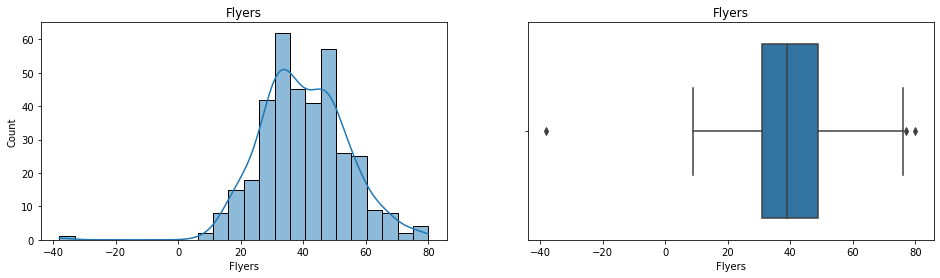

-------------------------------------------------------------------

Price
K: 3
Lower Fence: 0.5
Upper Fence: 0.5

Lower Outliers in Price

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Price

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

All Outliers in Price

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []


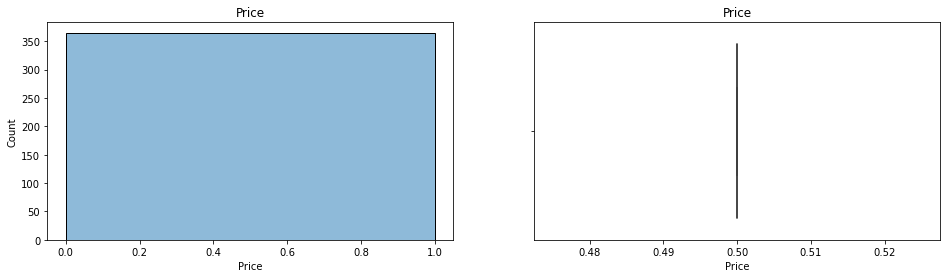

-------------------------------------------------------------------

Sales
K: 3
Lower Fence: -10.0
Upper Fence: 60.0

Lower Outliers in Sales

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Sales

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday         81.5      0.54      68    0.5    235
184  7/4/17   Tuesday         84.2      0.59      49    0.5    534

All Outliers in Sales

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday         81.5      0.54      68    0.5    235
184  7/4/17   Tuesday         84.2      0.59      49    0.5    534


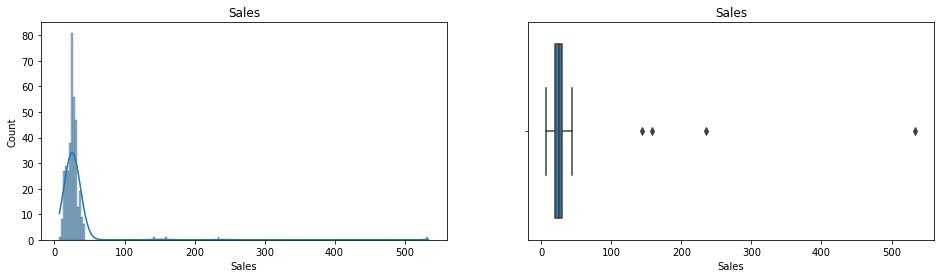

-------------------------------------------------------------------


In [8]:
#Using 3 as multiplier
get_low_and_up_bounds_df(lemonade_df, k=3)

In [9]:
# 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
# - Use a 2 sigma decision rule to isolate the outliers.
# - Do these make sense?
# - Should certain outliers be kept or removed?


# 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv


Temperature
K: 1.5
Lower Fence: 16.700000000000003
Upper Fence: 104.7

Lower Outliers in Temperature

         Date     Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17  Sunday         15.1       2.5       9    0.5      7

Upper Outliers in Temperature

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21

All Outliers in Temperature

         Date       Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17    Sunday         15.1      2.50       9    0.5      7
41    2/11/17  Saturday        212.0      0.91      35    0.5     21


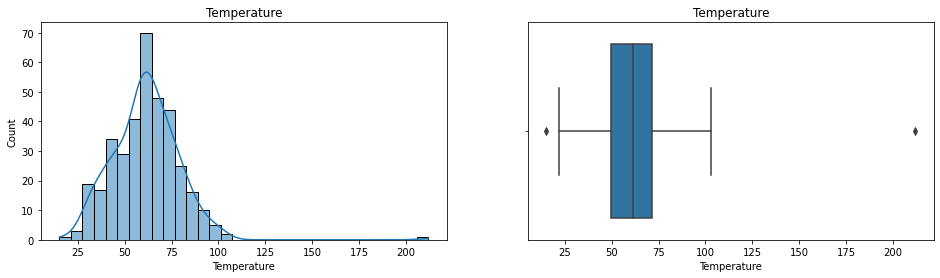

-------------------------------------------------------------------

Rainfall
K: 1.5
Lower Fence: 0.26
Upper Fence: 1.3

Lower Outliers in Rainfall

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Rainfall

         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday      

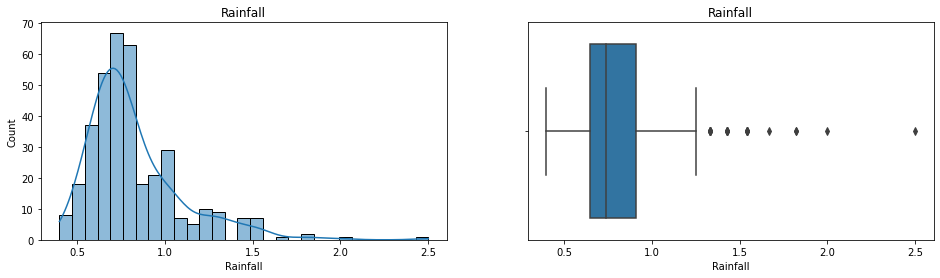

-------------------------------------------------------------------

Flyers
K: 1.5
Lower Fence: 4.0
Upper Fence: 76.0

Lower Outliers in Flyers

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20

Upper Outliers in Flyers

        Date     Day  Temperature  Rainfall  Flyers  Price  Sales
166  6/16/17  Friday         99.3      0.47      77    0.5     41
194  7/14/17  Friday         92.0      0.50      80    0.5     40

All Outliers in Flyers

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
166   6/16/17   Friday         99.3      0.47      77    0.5     41
194   7/14/17   Friday         92.0      0.50      80    0.5     40


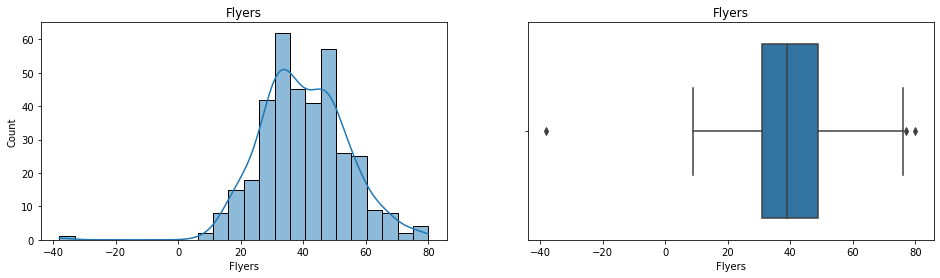

-------------------------------------------------------------------

Price
K: 1.5
Lower Fence: 0.5
Upper Fence: 0.5

Lower Outliers in Price

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Price

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

All Outliers in Price

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []


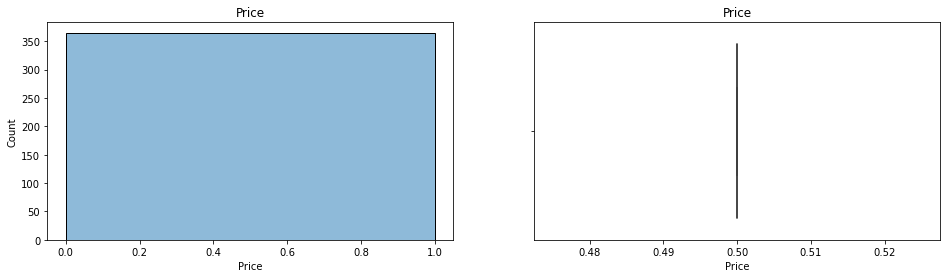

-------------------------------------------------------------------

Sales
K: 1.5
Lower Fence: 5.0
Upper Fence: 45.0

Lower Outliers in Sales

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Sales

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday         81.5      0.54      68    0.5    235
184  7/4/17   Tuesday         84.2      0.59      49    0.5    534

All Outliers in Sales

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday         81.5      0.54      68    0.5    235
184  7/4/17   Tuesday         84.2      0.59      49    0.5    534


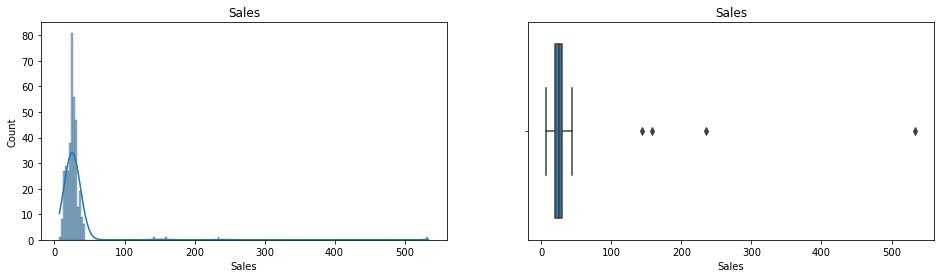

-------------------------------------------------------------------


In [10]:
#Using Function above with default of 1.5 as multiplier and looking at plots to see if normal distribution
get_low_and_up_bounds_df(lemonade_df, k=1.5)

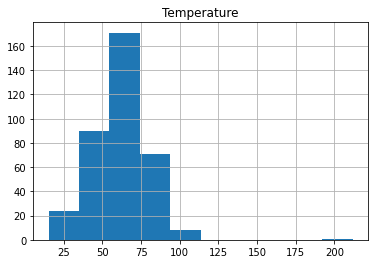

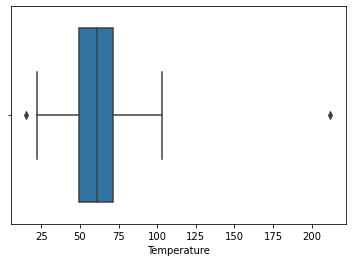

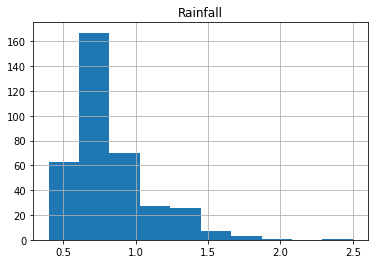

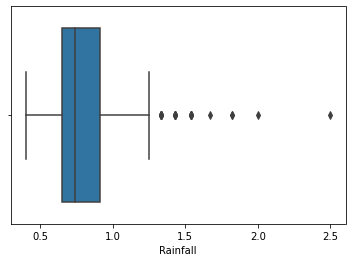

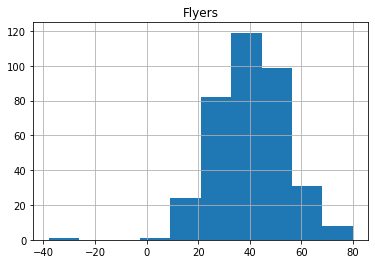

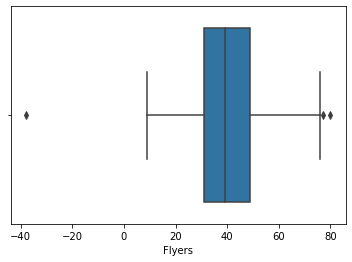

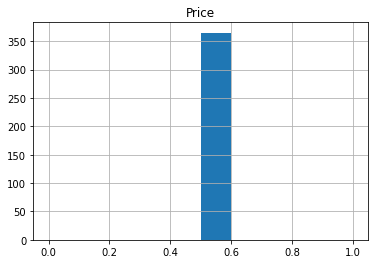

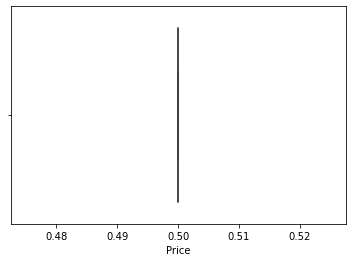

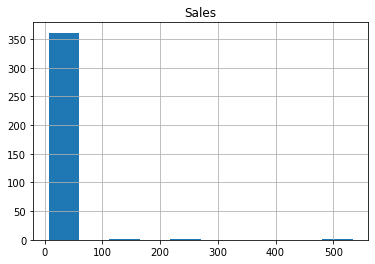

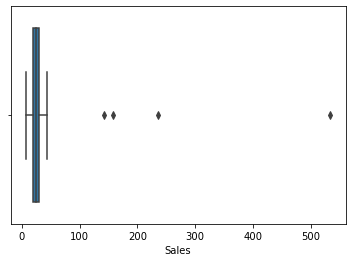

In [11]:
#Looking at distribution plots for columns
for col in lemonade_df.columns:
    if np.issubdtype(lemonade_df[col].dtype, np.number):
        lemonade_df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=lemonade_df, x=col)
        plt.show()

In [41]:
#Creating function to calculate Z-score and standard deviations
def z_score_func(df, n1, n2):
    '''
    This function reads in dataframe, the first standard deviation, the second deviation, and outputs
    a list of columns within the first standard deviation set and the second standard deviation set for each column
    '''
    col_list= ["Temperature", "Rainfall", "Flyers", "Price", "Sales"]
    for col in df[col_list]:
        # Calculate the z-score 
        zscores = pd.Series((df[col] - df[col].mean()) / df[col].std())
        # Finds all of the observations two standard deviations or more.
        standard_dev2= df[df[col].abs() >= n1]
        # Finds all of the observations three standard deviations or more
        standard_dev3= df[df[col].abs() >= n2]
        print('Standard Deviation 2')
        print(standard_dev2)
        print('-------------------------------------------------------------------------------------------- \n \n')
        print('Standard Deviation 3')
        print(standard_dev3) 

In [42]:
#List of column values within 2 or 3 standard deviation.
z_score_func(lemonade_df, 2, 3)

Standard Deviation 2
         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
3      1/4/17  Wednesday         44.1      1.05      28    0.5     17
4      1/5/17   Thursday         42.4      1.00      33    0.5     18
..        ...        ...          ...       ...     ...    ...    ...
360  12/27/17  Wednesday         42.7      1.00      33    0.5     19
361  12/28/17   Thursday         37.8      1.25      32    0.5     16
362  12/29/17     Friday         39.5      1.25      17    0.5     15
363  12/30/17   Saturday         30.9      1.43      22    0.5     13
364  12/31/17     Sunday         15.1      2.50       9    0.5      7

[365 rows x 7 columns]
-------------------------------------------------------------------------------------------- 
 

Standard Deviation